<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.4/506.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=fbc57413fa7131a41698f7f32812d8d58aaa991044ea887e8a359e92f78846be
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-10-03 17:52:17
-------------------
qualified stocks: 87
with latest results: 27
still star stocks: 16
-------------------
Initial Investment:  1.24 C
CY Investment:  1.51 C
Reserve:  57.44 K
Current:  1.41 C
-------------------
Today PnL: 86.11 K (0.61%)
Current PnL: -20.40 L (-13.54%)
CY Booked + Current PnL: -8.96 L (-5.95%)
-------------------
Total profit:  1.44 L
Total loss:  -21.84 L
-------------------
Total Booked + Current PnL: 18.02 L (14.57%)
Total Booked PnL: 38.42 L (31.06%)
Curr Year Booked PnL: 11.44 L (8.1%)
Prev Year Booked PnL: 26.98 L (21.81%)
Est FTT:  2.29 C
Est FTT PnL: 87.71 L (62.13%)
Deployed:  1.24 C
Current:  1.41 C
CAGR/XIRR %: 8.08%
Row successfully appended and saved to data/myPortfolioDB.csv.


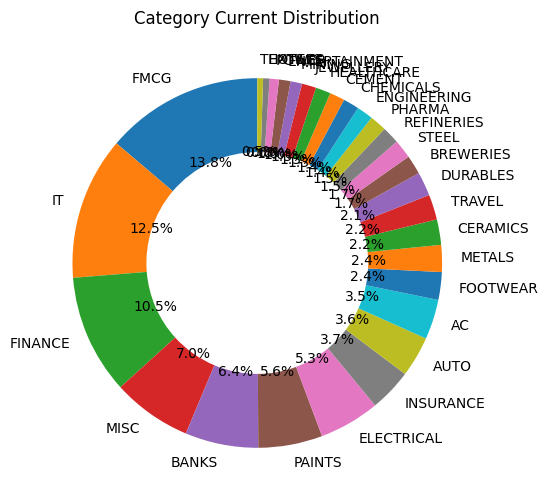

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
50,NATIONALUM,189.63,244.55,-40.83,13.00,H-MC,69.0,117215.0,16711.0,12401.0,...,16.63,10.58,28.96,79.0,1.35,0.83,56.24,MH,METALS,ATH
77,TTKPRESTIG,769.29,770.00,95.73,1.69,M-SC,43.0,84357.0,-16420.0,16509.0,...,-16.29,19.57,0.09,245.0,-0.99,0.60,10.83,OX40N,DURABLES,NTT
14,BLUESTARCO,1646.70,2080.00,10.09,2.98,H-MC,49.0,189920.0,25250.0,18080.0,...,15.33,9.52,26.31,89.0,1.40,1.35,24.54,X40N,AC,NTT
42,ITC,409.28,452.00,-38.84,2.17,H-LC,46.0,197703.0,-2435.0,23329.0,...,-1.22,11.80,10.44,4.0,-0.10,1.41,4.28,X40,FMCG,NTT
84,VOLTAS,1278.28,1530.00,-2.76,2.21,H-MC,46.0,204060.0,12318.0,25446.0,...,6.42,12.47,19.69,99.0,0.48,1.45,13.66,XY25,AC,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ACC,2379.51,3906.00,-37.64,4.28,M-MC,52.0,184910.0,-53041.0,205694.0,...,-22.29,111.24,64.15,174.0,-0.26,1.32,3.72,XY24,CEMENT,BTT
8,AWL,315.97,485.00,-64.18,3.00,H-SC,56.0,253457.0,-48294.0,209710.0,...,-16.00,82.74,53.50,116.0,-0.23,1.80,12.58,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,-10.78,3.57,H-SC,54.0,222386.0,-56173.0,313609.0,...,-20.17,141.02,92.42,151.0,-0.18,1.58,28.52,XY24,BANKS,NTT
58,REPCOHOME,463.60,880.00,-60.51,4.06,H-SC,50.0,227208.0,-59297.0,316637.0,...,-20.70,139.36,89.82,134.0,-0.19,1.62,20.21,XY24,FINANCE,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.43,7.66,H-LC,45.0,248808.0,-12811.0,132018.0,...,-4.90,53.06,45.57,7.0,-0.10,1.77,5.87,AR,ELECTRICAL,NTT
2,ACC,2379.51,3906.00,-37.64,4.28,M-MC,52.0,184910.0,-53041.0,205694.0,...,-22.29,111.24,64.15,174.0,-0.26,1.32,3.72,XY24,CEMENT,BTT
4,ANGELONE,2329.34,3033.00,1.99,11.19,H-SC,41.0,180507.0,-10499.0,68196.0,...,-5.50,37.78,30.21,157.0,-0.15,1.28,14.24,X40N,FINANCE,NTT
5,ASIANPAINT,2861.00,3465.66,-17.68,5.81,H-LC,33.0,207486.0,-44282.0,97498.0,...,-17.59,46.99,21.13,27.0,-0.45,1.48,11.61,X40,PAINTS,ATH
8,AWL,315.97,485.00,-64.18,3.00,H-SC,56.0,253457.0,-48294.0,209710.0,...,-16.00,82.74,53.50,116.0,-0.23,1.80,12.58,XY24,FMCG,NTT
9,BAJAJHFL,122.26,152.00,-13.17,4.64,H-MC,45.0,182876.0,-17630.0,66402.0,...,-8.79,36.31,24.33,90.0,-0.27,1.30,5.46,X40N,FINANCE,BTT
11,BANKINDIA,116.91,190.00,-25.37,10.07,H-MC,69.0,193065.0,13257.0,99158.0,...,7.37,51.36,62.52,88.0,0.13,1.37,43.97,XR,BANKS,NTT
12,BATAINDIA,1550.24,2096.00,6.74,4.77,M-SC,53.0,100546.0,-28124.0,73419.0,...,-21.86,73.02,35.20,219.0,-0.38,0.72,15.40,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-18.10,3.61,H-MC,55.0,219753.0,-7586.0,55641.0,...,-3.34,25.32,21.14,106.0,-0.14,1.56,23.86,XY24,PAINTS,NTT
14,BLUESTARCO,1646.70,2080.00,10.09,2.98,H-MC,49.0,189920.0,25250.0,18080.0,...,15.33,9.52,26.31,89.0,1.40,1.35,24.54,X40N,AC,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,117.55,7.11,H-SC,43.0,147534.0,-70962.0,99158.0,...,-32.48,67.21,12.90,153.0,-0.72,1.05,12.30,OX40N,FINANCE,NTT
18,CERA,7647.97,9475.0,-22.43,1.48,H-SC,39.0,141416.0,-34487.0,76506.0,...,-19.61,54.10,23.89,149.0,-0.45,1.01,22.13,OX40N,CERAMICS,NTT
38,INDIGOPNTS,1407.73,1408.0,104.80,1.77,M-SC,41.0,134428.0,-40131.0,40167.0,...,-22.99,29.88,0.02,221.0,-1.00,0.96,16.93,OX40N,PAINTS,NTT
43,JCHAC,2282.24,2282.0,19726.09,1.82,M-SC,45.0,96902.0,-30903.0,30892.0,...,-24.18,31.88,-0.01,232.0,-1.00,0.69,9.73,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-66.99,1.85,H-SC,61.0,227124.0,-42543.0,78880.0,...,-15.78,34.73,13.47,138.0,-0.54,1.62,14.88,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1697.98,3.06,L-SC,44.0,49059.0,-88118.0,88208.0,...,-64.24,179.80,0.07,267.0,-1.00,0.35,22.01,OX40N,JEWELLERY,NTT
63,SFL,1016.35,1287.0,32.15,6.70,M-SC,43.0,174537.0,-87681.0,157502.0,...,-33.44,90.24,26.63,229.0,-0.56,1.24,8.52,XY24,MISC,NTT
66,SIS,435.42,528.0,2069.43,3.70,H-SC,39.0,87542.0,-23490.0,47098.0,...,-21.16,53.80,21.26,156.0,-0.50,0.62,18.28,OX40N,MISC,NTT
70,SYMPHONY,1306.42,1306.0,-43.42,17.88,M-SC,42.0,120658.0,-50483.0,50423.0,...,-29.50,41.79,-0.03,196.0,-1.00,0.86,3.01,OX40N,DURABLES,NTT
72,TATAELXSI,6938.68,9161.0,-24.72,6.27,H-MC,40.0,101754.0,-30081.0,72306.0,...,-22.82,71.06,32.03,98.0,-0.42,0.72,13.97,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2379.51,3906.00,-37.64,4.28,M-MC,52.0,184910.0,-53041.0,205694.0,...,-22.29,111.24,64.15,174.0,-0.26,1.32,3.72,XY24,CEMENT,BTT
7,ATULAUTO,579.80,844.00,3618.92,7.88,M-SC,51.0,166974.0,-30158.0,119988.0,...,-15.30,71.86,45.57,236.0,-0.25,1.19,18.38,XY24,AUTO,NTT
8,AWL,315.97,485.00,-64.18,3.00,H-SC,56.0,253457.0,-48294.0,209710.0,...,-16.00,82.74,53.50,116.0,-0.23,1.80,12.58,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,-10.78,3.57,H-SC,54.0,222386.0,-56173.0,313609.0,...,-20.17,141.02,92.42,151.0,-0.18,1.58,28.52,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-18.10,3.61,H-MC,55.0,219753.0,-7586.0,55641.0,...,-3.34,25.32,21.14,106.0,-0.14,1.56,23.86,XY24,PAINTS,NTT
16,CAMPUS,294.86,393.00,-24.66,1.61,M-SC,56.0,157016.0,-10759.0,66606.0,...,-6.41,42.42,33.28,210.0,-0.16,1.12,21.70,XY24,FOOTWEAR,NTT
20,COALINDIA,406.65,497.97,5.81,4.24,L-LC,42.0,141840.0,-8620.0,42410.0,...,-5.73,29.90,22.46,167.0,-0.20,1.01,11.31,XY25,MINING,ATH
22,COLPAL,2633.65,3767.14,-5.10,7.09,H-MC,34.0,221390.0,-41975.0,155327.0,...,-15.94,70.16,43.04,84.0,-0.27,1.57,2.78,XY25,FMCG,ATH
23,DABUR,511.48,735.00,-10.97,4.66,H-MC,33.0,240633.0,-7435.0,115841.0,...,-3.00,48.14,43.70,102.0,-0.06,1.71,11.02,XY24,FMCG,BTT
25,EASEMYTRIP,18.12,26.40,-17.58,29.34,M-SC,34.0,79430.0,-97385.0,178177.0,...,-55.08,224.32,45.70,197.0,-0.55,0.56,1.62,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.43,7.66,H-LC,45.0,248808.0,-12811.0,132018.0,...,-4.90,53.06,45.57,7.0,-0.10,1.77,5.87,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,-14.07,9.74,H-SC,27.0,81038.0,-19925.0,114458.0,...,-19.74,141.24,93.63,148.0,-0.17,0.58,20.70,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,6522.22,4.85,L-SC,43.0,72687.0,-21123.0,97742.0,...,-22.52,134.47,81.67,269.0,-0.22,0.52,40.76,XR,CERAMICS,NTT
11,BANKINDIA,116.91,190.00,-25.37,10.07,H-MC,69.0,193065.0,13257.0,99158.0,...,7.37,51.36,62.52,88.0,0.13,1.37,43.97,XR,BANKS,NTT
15,BSOFT,551.58,836.99,-20.60,13.94,H-SC,33.0,89250.0,-51403.0,124182.0,...,-36.55,139.14,51.74,131.0,-0.41,0.63,1.78,XR,IT,ATH
21,COFFEEDAY,59.14,80.00,-45.67,37.44,L-SC,44.0,79162.0,-34387.0,74436.0,...,-30.28,94.03,35.27,268.0,-0.46,0.56,93.75,XR,HOTELS,NTT
24,DEN,52.79,75.00,99.48,1.90,M-SC,50.0,56368.0,-28096.0,63634.0,...,-33.26,112.89,42.07,237.0,-0.44,0.40,19.71,AR,ENTERTAINMENT,NTT
27,HAPPSTMNDS,801.03,1488.71,-22.26,11.16,H-SC,23.0,83728.0,-44437.0,154461.0,...,-34.67,184.48,85.85,132.0,-0.29,0.60,0.00,AR,IT,ATH
28,HATHWAY,18.12,31.40,892.75,2.62,H-SC,42.0,85440.0,-23280.0,102964.0,...,-21.41,120.51,73.29,161.0,-0.23,0.61,14.29,XR,ENTERTAINMENT,NTT
36,IEX,147.35,219.00,-31.78,17.61,H-SC,49.0,194852.0,-5102.0,102336.0,...,-2.55,52.52,48.63,115.0,-0.05,1.39,8.71,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.94
1,20,35.37
2,30,50.61


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.16
LC,30.28
MC,23.60


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.03
X40,14.46
X40N,11.20
XR,11.05
XY25,10.36
AR,8.20
OX40N,7.79
MH,1.64
X200,1.64


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,30.93
H-LC,23.73
H-MC,20.33
M-SC,13.80
M-LC,5.54
M-MC,2.97
L-SC,1.43
L-LC,1.01
L-MC,0.30


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
XY24,H-SC,11.48
X40,H-LC,8.58
XY24,M-SC,6.86
XR,H-SC,6.11
XY25,H-LC,5.27
X40,H-MC,5.16
XY24,H-MC,4.91
AR,H-SC,4.38
X40N,H-MC,4.32


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,13.79,-5.83,40.76
IT,12.49,-19.72,84.99
FINANCE,10.46,-14.83,66.99
MISC,6.95,-17.52,82.85
BANKS,6.39,-10.86,69.18
PAINTS,5.62,-17.06,34.51
ELECTRICAL,5.31,-10.33,49.04
INSURANCE,3.75,-5.16,44.47
AUTO,3.56,-14.88,69.80


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,58.0,8152221.0,-11.84,-965091.0,57.77,4709764.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.18,7898158.0,-6.33,-500097.0,43.66,3448441.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3211419.0
XR,1356304.0
AR,1180041.0
X40,818854.0
X40N,629802.0
OX40N,552748.0
XY25,480685.0
SR,260129.0
X5K,103844.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3910717.0
M-SC,1492324.0
H-LC,1203639.0
H-MC,1065728.0
M-LC,370231.0
M-MC,365911.0
L-SC,260386.0
L-MC,59996.0
L-LC,42410.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1422129.0
          M-SC           840115.0
AR        H-SC           806413.0
XR        H-SC           784292.0
X40       H-LC           531746.0
XY24      M-MC           365911.0
          H-MC           354522.0
X40N      H-SC           313344.0
SR        H-SC           260129.0
OX40N     H-SC           254243.0
X40       H-MC           213689.0
AR        H-LC           207387.0
X40N      H-LC           183579.0
XY25      H-MC           180773.0
XR        L-SC           172178.0
AR        M-SC           166241.0
XY24      M-LC           155392.0
XY25      M-SC           144873.0
OX40N     M-SC           137991.0
X40N      H-MC           132879.0
XR        M-SC           129685.0
XY25      H-LC           112629.0
XR        M-LC           110995.0
X5K       M-LC           103844.0
XR        H-MC            99158.0
X200      H-LC            94948.0
OX40N     L-SC            88208.0
X40       M-SC            73419.0
XY24      H-LC            73350.0
OX40N     H-MC            72306.0
MH        H-SC            70167.0
XR        L-MC            59996.0
XY25      L-LC            42410.0
MH        H-MC            12401.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,30
M-SC,17
H-MC,15
H-LC,14
M-LC,4
L-SC,3
M-MC,2
L-LC,1
L-MC,1
